<div style="margin-top:120px;">
    <h1 style="text-align:center;">Human Resources Analytics Part 3: Predictions </h1>
</div>

<div style="width:100%; margin-top:30px;">
    <p style="text-align:center;">William Walter da Silva</p>
</div>

### Abstract

In this final part, we will predict who are the employees that can leave the company in the future. To do this, we will work with supervised algorithms such as Random Forest and K Nearest Neighbors Classifiers. The results are compared and evaluation metrics are calculated: Precision, Recall, F1 Score and Area Under the ROC Curve. Finally we will apply an unsupervised learning algorithm as K-means to the original data to obtain insights about abnormal behavior in the employees clusters. With this information it is possible for managers to improve the strategy to retain the best employees.

## 1. The Human Resources Dataset

   The Human Resources Analytics is a simulated dataset from <a href="https://www.kaggle.com/ludobenistant/hr-analytics">Kaggle</a> and the focus is to understand why the best and most experienced employees is leaving the company.
   By the exploration of this data set its possible to extract good insights of a problems that the Human Resource department deals daily.
   In many industries retain their best employees its a question of long term strategy, and can impact the companies growth or put in financial risk, mainly if the employees leave to work at the competitor.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#### Load the data

To load the dataset we use a Pandas method called **read_csv** that read CSV(comma-separated) files and covert into DataFrame.

In [55]:
data = pd.read_csv('HR_comma_sep.csv')

### Load the train and test data from the **Part 2**.

In [56]:
X_train_res = pd.read_csv('X_train_res.csv')

Y_train_res = pd.read_csv('Y_train_res.csv', index_col = 0)

test_features = pd.read_csv('test_features.csv')

test_target = pd.read_csv('test_target.csv', index_col=0)

data_drop = pd.read_csv('data_drop.csv', index_col=0)

## 2. How to compare models predictions

Before we build our models, we will see how to evaluate them and, therefore, analyze how good the predictions are.

### 2.1. Comparing Classifier Performance

The most commonly reported measure of classifier is **accuracy** that is the percent of correct classifications obtained. It is a easy way to understand and make comparison of the performance of different classifiers.

However, while working in an imbalanced dataset accuracy is not an appropriate measure to evaluate model performance. 

In the last article, the **Linear Regression Model classifier** achieved an accuracy of 76 % with the imbalanced dataset, this happened because it classified all instances as the majority class and eliminates the 24% minority class observations as noise.

### 2.2. Performance Metrics

Most classifiers produce a score, which is used to decide the classification. The range of the score is between 0.0 (definitely negative) and 1.0 (definitely positive) and values over 0.5 are considered positive.

Any threshold applied to a dataset(which **PP** is the positive population and **NP** is the negative population) is going to produce four possibles outcomes:
-  ** True Positives (TP)**: The instance is **positive** and it is classified **as positive**.
-  ** False Positives (FP)**: The instance is **negative** and it is classified **as positive**.
-  ** True Negatives (TN)**: The instance is **negative** and it is classified **as negative**.
-  ** False Negatives (FN)**: The instance is **positive** and it is classified **as negative**.

***

#### The figure below shows that overlapping datasets will always generate false positives and negatives as well as true positives and negatives.

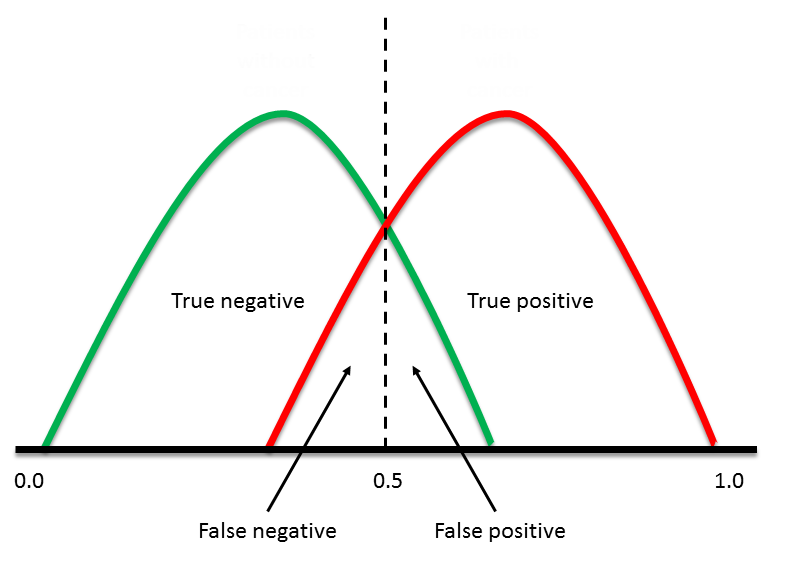

In [57]:
from IPython.display import Image
Image(filename = 'ROC1.png',width=450, height=450)

### 2.3. Confusion Matrix 

A confusion matrix is a specific **table layout** that allows visualization of the performance of an algorithm and each row of the matrix represents the instances in an **actual class** while each column represents the instances in a **predicted class** (or vice versa).The name stems from the fact that it makes it easy to see if the system is confusing two classes. Once you have numbers for all of these measures, some useful metrics can be calculated.

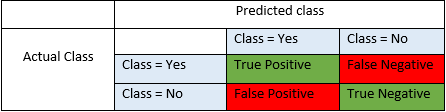

In [58]:
Image(filename = 'table.png', width=700, height= 600)

### 2.4  Metrics

#### With these four parameters  we can calculate some important metrics.

###  Error rate

Error rate(ERR) is calculated as the number of all incorrect predictions divided by the total number of the dataset.
 
\\begin{equation}
Error \ rate = \frac{FP + FN}{ TP + TN + FN + FP} = \frac{FP+FN}{P+N}
\\end{equation}



###  Accuracy

Accuracy (ACC) is calculated as the number of all correct predictions divided by the total number of the dataset. It can also be calculated by **(1 – ERR)**.

\\begin{equation}
Accuracy = \frac{TP + TN}{PP + NP}
\\end{equation}


###  Recall

Recall (REC) is calculated as the number of correct positive predictions divided by the total number of positives. It is also called **Sensitivity or True Positive Rate (TPR)**

\\begin{equation}
REC = \frac{TP}{TP + FN} = \frac{TP}{PP}
\\end{equation}

### Specificity

Specificity (SP) is calculated as the number of correct negative predictions divided by the total number of negatives. It is also called **True negative rate (TNR)**.

\\begin{equation}
SP = \frac{TN}{TN + FP} = \frac{TN}{NP}
\\end{equation}

### Precision

Precision (PREC) is calculated as the number of correct positive predictions divided by the total number of positive predictions.

\\begin{equation}
PREC = \frac{TP}{TP + FP}
\\end{equation}

### F1 Score

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.


\\begin{equation}
F1\ score = 2 . \frac{Recall . Precision}{Recall + Precision}
\\end{equation}


## 3. ROC Curves

A receiver operating characteristics (ROC) graph is a technique for visualizing and selecting classifiers based on their performance and were developed for use in signal detection in radar returns in the 1950's, and have been applied to a wide range of problems.

One of the earliest adopters of ROC graphs in machine learning was Spackman (1989), who demonstrated the value of ROC curves in evaluating and comparing algorithms.

ROC graphs are two-dimensional graphs in which **True Positive Rate (TPR)** is plotted on the Y axis and **False Positive Rate(FPR)** is plotted on the X axis. An ROC graph depicts relative tradeoffs between benefits (true positives) and costs (false positives).


** True Positive Rate:**
\\begin{equation}
TPR = \frac{TP}{TP + FN}
\\end{equation}


** False Positive Rate:**
\\begin{equation}
FPR = \frac{FP}{TN + FP} = 1 - specificity
\\end{equation}

For the ROC curves is important to **Maximize the True Positive Rate** while **Minimizing the False Positive Rate**

The **diagonal line y = x** represents the strategy of randmly guessing a class, for example, if a classifier randomly guesses the positive class half the time, it can be expected to get half the positives and half the negatives correct.

Points above the diagonal represent good classification results (better than random), points below the line poor results (worse than random).

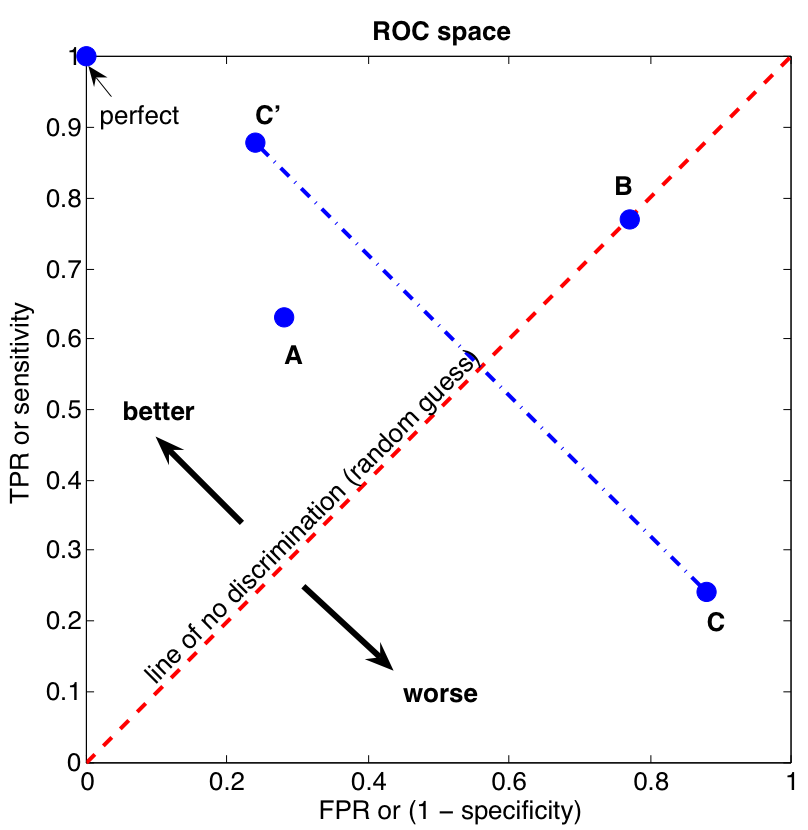

In [59]:
Image(filename = 'ROC_space.png', width = 500, height=500)

### 3.1. Class Skew

ROC curves are insensitive to changes in class distribution. If the proportion of positive to negative instances changes in a test set, the ROC curves will not change. To see why this is so, consider the confusuion matrix in table above. Note that the class distribution the proportion of positive to negative instances - is the relationship of the top (+) line to the bottom (-) line of the actual class. 

Any performance metric that uses values from both lines will be inherently sensitive to class skews. Metrics such as accuracy, precision and F score use values from both lines of the confusion matrix. As a class distribution changes these measures will change as well, even if the fundamental classifier performance does not. ROC graphs are based upon **tp rate and fp rate**, in which each dimension is a strict linear ratio, so do not depend on class distributions.(Fawcett, 2006)

### 3.2. Area under an ROC curve (AUC)

An ROC curve is a two-dimensional representation of classifier performance. To compare classifiers we may want to reduce ROC performance to a single scalar value representing expected performance. <br>
    A common method is to calculate the area under the ROC curve, abbreviated AUC (Bradley, 1997; Hanley and McNeil, 1982). Since the AUC is a portion of the area of the unit square, its value will always be between 0 and 1.0. <br>
    However, because random guessing produces the diagonal line between (0, 0) and (1, 1), which has an area of 0.5, no realistic classifier should have an AUC less than 0.5. <br>
The AUC of a classifier is equivalent to the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance.

## 4. Random Forest Classifier

A Random Forest consists of an arbitrary number of simple trees, which are used to determine the final outcome.  For classification problems, the ensemble of simple trees vote for the most popular class. In the regression problem, their responses are averaged to obtain an estimate of the dependent variable. Using tree ensembles can lead to significant improvement in prediction accuracy (i.e., better ability to predict new data cases).


Random forest algorithm can used both for classification and the regression kind of problems.

In [60]:
# Model 1 - Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=5)

forest.fit(X_train_res, Y_train_res.values.ravel())

rf_pred = forest.predict(test_features)

### 4.1 Confusion matrix

In [61]:
from sklearn.metrics import confusion_matrix

conmat_2 = np.array(confusion_matrix(test_target, rf_pred))
confusion_matrix_2 = pd.DataFrame(conmat_2, index = ["Not_left", "Left"], columns = ["Pred_not_left", "Pred_left"])

confusion_matrix_2

,Pred_not_left,Pred_left
Not_left,2193,63
Left,29,715


### 4.2 AUC Score 

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_score = roc_auc_score(test_target, rf_pred  )
print('AUC Score: %0.2f' % auc_score)


AUC Score: 0.97


### 4.3. Roc Curve

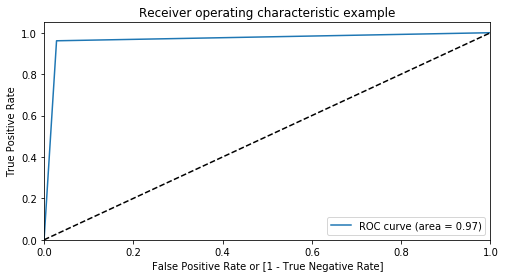

In [63]:
fpr, tpr, thresholds = roc_curve( test_target,
                                     rf_pred,
                                     drop_intermediate = False )

plt.figure(figsize=(8, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 5. K Nearest Neighbor Classifier

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the **new point**, and predict the label from these.

When the **training data ** along with their **independent features and labels** are fed, it stores all of it in **the memory**, or, rather plots the data in an n-dimensional space on the basis of its features.

When this algorithm is faced by a **test sample**, it plots that sample in the same n-dimensional space as the training data and then searches for its **k nearest neighbors** based on any of these distance measures from the training samples. Yes, it goes through the complete training data every time it needs to predict a test sample’s classification label! This is why it’s called a **Lazy learning technique**.

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_res, Y_train_res.values.ravel())
knn_pred = knn.predict(test_features)

### 5.1 Confusion Matrix

In [65]:
conmat_3 = np.array(confusion_matrix(test_target, knn_pred))
confusion_matrix_3 = pd.DataFrame(conmat_3, index = ["Act_Not_left", "Act_left"], columns = ["Pred_not_left", "Pred_left"])

confusion_matrix_3

,Pred_not_left,Pred_left
Act_Not_left,2085,171
Act_left,31,713


### 5.2 AUC Score and Roc Curve

In [66]:
auc_score = roc_auc_score(test_target, knn_pred  )
round( float( auc_score ), 2 )

0.94

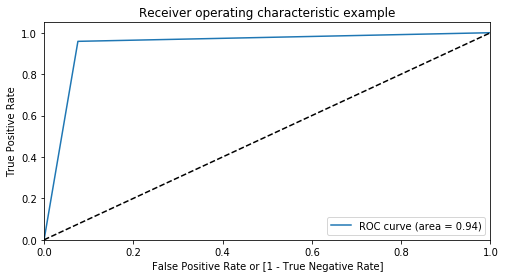

In [67]:
fpr, tpr, thresholds = roc_curve(test_target,
                                     knn_pred,
                                     drop_intermediate = False )

plt.figure(figsize=(8, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 6. Evaluation Metrics for Binary Classification

Let's compare the metrics of the Random Forest and K-Nearest Neighbors Classifiers to identy which one is the best algorithm to predict which employees can leave in the future.

In [68]:
from sklearn.metrics import classification_report

print('Random Forest Metrics:\n',classification_report(test_target, rf_pred), '\n')

print("K-Nearest Neighbors:\n", classification_report(test_target, knn_pred))

Random Forest Metrics:
              precision    recall  f1-score   support

          0       0.99      0.97      0.98      2256
          1       0.92      0.96      0.94       744

avg / total       0.97      0.97      0.97      3000
 

K-Nearest Neighbors:
              precision    recall  f1-score   support

          0       0.99      0.92      0.95      2256
          1       0.81      0.96      0.88       744

avg / total       0.94      0.93      0.93      3000



## 7. Comparing the predictions with actual test data

The **Random Forest Classifier** achieved the best performance, so let's compare the predictions made with the actual data. 

In [69]:
rf_predict_df = pd.DataFrame(test_target)

rf_predict_df['predicted'] = forest.predict(test_features)

rf_predict_df.head()

#You can save to csv
rf_predict_df.to_csv('Comparing_predictions.csv')

### 7.1 Predict Probability

In the data frame below we have the probability of each employee leaves the company.
**Note that the test_features index begins at zero, we will insert the same index of the test_target, so we can identify the employee.**

In [70]:
predict_proba_df = pd.DataFrame( forest.predict_proba( test_features ) )

predict_proba_df.head()

predict_proba_df.to_csv('probability.csv')

### 7.2 Define a strategy

Here we display the first 300 employees that the company should retain. 
Once identified who are the employees that might leave soon we could contact the departments managers and define a strategy to retain the valuables employees.

In [71]:
#Create a column with the test_target index, because the test_features was created it didn't have index.
predict_proba_df['index'] = test_target.index

predict_proba_new = predict_proba_df.set_index('index')

pd.DataFrame(predict_proba_new[1].sort_values(ascending = False)[0:300]).head(10)

,1
index,
14318,1.0
469,1.0
14816,1.0
1958,1.0
299,1.0
12597,1.0
560,1.0
14240,1.0
1857,1.0


## 8. K-Means

It’s an unsupervised learning algorithm which groups the given data, such that data points with similar behaviour are merged into one group.
Main aim is to segregate the various data points into different groups called clusters such that entities in a particular group comparatively have more similar traits than entities in another group.

In [72]:
from sklearn.cluster import KMeans

### 8.1 Select the most import features

As we already knows which are the most representative features in the data set we will jump to select only them. Doing this we will standardize the data to apply the K-means algorithm

In [73]:
reduced_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

### 8.2 Standardize the data set

In [74]:
data_reduced = data_drop[reduced_features]

std = StandardScaler()

data_reduced_std = std.fit_transform(data_reduced)

### 8.3 Elbow Diagram

When using k-means clustering, users need some way to determine whether they are using the right number of clusters.

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k, and for each value of k calculate the sum of squared errors (SSE).

Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

We want a small SSE, but that the SSE tends to decrease toward 0 as we increase k. So we need to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

However, the elbow method doesn't always work well and after trying out every k from 3 to 10, settled on k = 7 that yielded cluster probability values with the most distinct split.

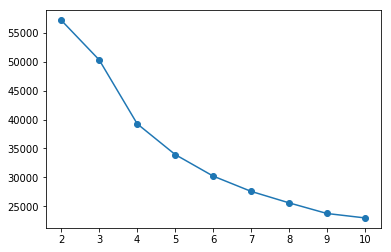

In [75]:
# Inertia vs. # of clusters
x1 = []
y1 = []
for n in range(2,11):
    km = KMeans(n_clusters=n, random_state=7)
    km.fit(data_reduced_std)
    x1.append(n)
    y1.append(km.inertia_)
plt.scatter(x1, y1)
plt.plot(x1, y1);

### 8.4 Selection the number of clusters

In [76]:
km = KMeans(n_clusters=7, n_init=20, random_state=7)

km.fit(data_reduced_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=7, tol=0.0001, verbose=0)

### 8.5 Percentage of employees that left for each cluster

To help identifing which cluster to direct our focus, let's see the percentage of employees that **left** from each cluster.

1. We create a new data frame with all the employees that left the company.
2. Include a column named 'cluster' that will receive the number of the cluster.
3. Group the data by cluster.

In [77]:
kmpredict = pd.DataFrame(data=data['left']==1)

kmpredict['cluster'] = km.labels_

round(kmpredict.groupby('cluster').mean()*100,2)

,left
cluster,
0,58.17
1,59.49
2,1.85
3,2.29
4,1.77
5,55.24
6,2.43


### 8.6 Identify the cluster with employees that can leave

#### There are 3 cluster with employees that can leave.

Cluster 0: Working too many hours because the quantity of projects, the suggestion is to reassign some of the projects to other group.(Cluster 3)

Cluster 1: Poor evaluation, small number of project and not satisfied with the company.

In cluster 5 the employees has very good performance, work hard in more than 4 projects and have almost 5 years in the company.
For this cluster, the suggestion is by review the promotion status can prevent this employees to leave.

In [78]:
columns = {str(x): std.inverse_transform(km.cluster_centers_[x]) for x in range(0,len(km.cluster_centers_))}
pd.DataFrame(columns, index=data_reduced.columns)

,0,1,2,3,4,5,6
satisfaction_level,0.157488,0.418864,0.632441,0.721840,0.730694,0.800972,0.720219
last_evaluation,0.817119,0.532892,0.686178,0.884750,0.614076,0.901630,0.636842
number_project,5.719287,2.326146,3.657213,3.526643,4.147905,4.559875,3.675478
average_montly_hours,251.396192,149.544474,193.293465,190.481203,160.877568,244.334169,242.498087
time_spend_company,4.254300,3.059299,7.647349,2.788493,3.016434,4.685893,2.800348


### 8.7 Number of employees in each cluster

With the original data we will get only the employees that stayed in the company, predict the cluster and them count how many employees are in each one. This information can support the HR department about the qunantity of turnover in the company if the departments managers won't take the right actions to retain the best employees.

In [79]:
risk_to_leave = data[data['left']==0]

risk_to_leave = risk_to_leave[reduced_features]

In [80]:
km_to_list = km.fit_predict(risk_to_leave)
km_to_list.shape

(11428,)

In [81]:
cluster_df = pd.DataFrame(risk_to_leave)
cluster_df["cluster"]= km_to_list

print('Cluster_0:',cluster_df[cluster_df['cluster']==0].shape[0], 'employees.')
print('Cluster_1:',cluster_df[cluster_df['cluster']==1].shape[0], 'employees.')
print('Cluster_2:',cluster_df[cluster_df['cluster']==2].shape[0], 'employees.')
print('Cluster_3:',cluster_df[cluster_df['cluster']==3].shape[0], 'employees.')
print('Cluster_4:',cluster_df[cluster_df['cluster']==4].shape[0], 'employees.')
print('Cluster_5:',cluster_df[cluster_df['cluster']==5].shape[0], 'employees.')
print('Cluster_6:',cluster_df[cluster_df['cluster']==6].shape[0], 'employees.')

Cluster_0: 1613 employees.
Cluster_1: 2067 employees.
Cluster_2: 1802 employees.
Cluster_3: 1697 employees.
Cluster_4: 534 employees.
Cluster_5: 1986 employees.
Cluster_6: 1729 employees.


## Conclusions 

- Random Forest were better in predicting than k Nearest Neighbors. We build a table with the probability of each employee leave the company.

- K-means with 7 clusters identified 3 clusters that have high employee attrition (55-60% vs avg. of 24%) and 4 clusters of low attrition (1-3%). Identify what type of employees each cluster represents then take necessary actions to improve on employee retention.